In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_notas = pd.read_csv('./data/infobae_notas.csv', index_col = 0)
df = pd.read_csv('./data/commentarios_infobae.csv', index_col = 0)
#infobae = pd.read_csv('./data/commentarios_infobae.csv', index_col = 0)

In [4]:
#Cantidad de notas recopiladas y cantidad de comments totales
df_notas.shape[0], df.shape[0]

(862, 46191)

In [5]:
#cantidad de recopiladas por sección
df_notas.groupby('seccion').count()

,abierta_comentarios,autor,cuerpo,fecha,titulo,url,keywords
seccion,,,,,,,
america/mundo,145,4,145,145,145,145,145
deportes-2,145,17,139,145,145,145,145
economia,138,72,138,138,138,138,138
politica,145,43,145,145,145,145,145
sociedad,144,29,142,144,144,144,144
teleshow/infoshow,145,20,144,145,145,145,145


In [6]:
#dimensiones de cada dataset
df_notas.columns

Index(['abierta_comentarios', 'autor', 'cuerpo', 'fecha', 'seccion', 'titulo',
       'url', 'keywords'],
      dtype='object')

In [7]:
df.columns

Index(['es_respuesta', 'fecha', 'likes', 'respuestas', 'texto', 'usuario',
       'seccion', 'titulo', 'url', 'severe_toxicity', 'toxicity'],
      dtype='object')

In [11]:
#cantidad de comentarios por sección (y cantidad de notas firmadas)
df.groupby('seccion').count()['texto']

seccion
america/mundo         2181
deportes-2            4188
economia              9036
politica             15926
sociedad             10016
teleshow/infoshow     4844
Name: texto, dtype: int64

C:\Users\p_bag\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


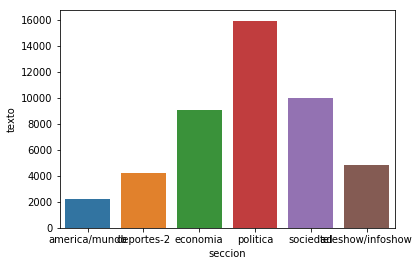

In [12]:
sns.barplot(df.groupby('seccion').count().index, df.groupby('seccion').count().texto)

In [13]:
#promedio de comentarios por sección
df.groupby('titulo').count().merge(df_notas, how = 'left', on = 'titulo').groupby('seccion_y').mean().texto

seccion_y
america/mundo         21.174757
deportes-2            33.504000
economia              77.896552
politica             119.914894
sociedad              76.083333
teleshow/infoshow     36.977099
Name: texto, dtype: float64

In [14]:
#promedio de toxicidad por sección
df.groupby('seccion').mean().toxicity

seccion
america/mundo        0.311975
deportes-2           0.262892
economia             0.228657
politica             0.297190
sociedad             0.301334
teleshow/infoshow    0.295221
Name: toxicity, dtype: float64

In [15]:
#promedio de toxicidad severa por sección
df.groupby('seccion').mean().severe_toxicity

seccion
america/mundo        0.312666
deportes-2           0.204083
economia             0.179382
politica             0.250614
sociedad             0.272141
teleshow/infoshow    0.234767
Name: severe_toxicity, dtype: float64

In [16]:
#cantidad comentarios con más de 500 caracteres
df.texto = df.texto.apply(lambda x : x.replace('\r','').replace('\n',''))
df['caracteres'] = df.texto.apply(len)
df.loc[df.caracteres > 500].shape[0]

1485

In [17]:
#cantidad de 500 caracteres sin espacio
df['caracteresSE'] = df.texto.apply(lambda x: len(x) - x.count(' '))
df.loc[df.caracteresSE > 500].shape[0]

850

In [18]:
#porcentaje de comentarios "es_respuesta" por sección
df.groupby('seccion').mean().es_respuesta *100

seccion
america/mundo        47.455296
deportes-2           39.374403
economia             44.477645
politica             37.969358
sociedad             49.990016
teleshow/infoshow    27.167630
Name: es_respuesta, dtype: float64

In [19]:
#porcentaje de categorias
import glosariosRe

In [20]:
import re
misoginos = df.loc[df.texto.str.contains(glosariosRe.misoginos, flags = re.IGNORECASE, na = False)]
racistas = df.loc[df.texto.str.contains(glosariosRe.racistas, flags = re.IGNORECASE, na = False)]
xenofobos = df.loc[df.texto.str.contains(glosariosRe.xenofobos, flags = re.IGNORECASE, na = False)]
ideologicos = df.loc[df.texto.str.contains(glosariosRe.ideologicos, flags = re.IGNORECASE, na = False)]
violentos = df.loc[df.texto.str.contains(glosariosRe.violentos, flags = re.IGNORECASE, na = False)]
homofobicos = df.loc[df.texto.str.contains(glosariosRe.homofobicos, flags = re.IGNORECASE, na = False)]
periodistas = df.loc[df.texto.str.contains(glosariosRe.periodistas, flags = re.IGNORECASE, na = False)]

C:\Users\p_bag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\p_bag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\p_bag\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
C:\Users\p_bag\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\p_bag\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\p_bag\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

In [21]:
import numpy as np
def porcentajes(df):
    return (df.seccion.value_counts()/df.seccion.value_counts().sum()*100).astype(int)
def graficar(df):
    plt.ylim(0, 62)
    sns.barplot(porcentajes(df).index, porcentajes(df).values)

C:\Users\p_bag\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


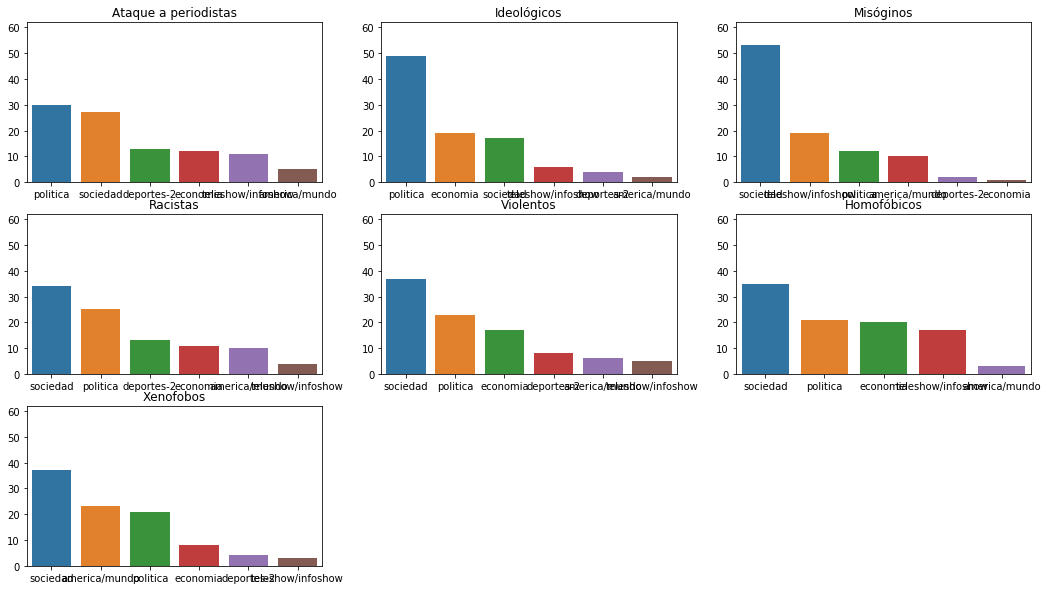

In [22]:
plt.figure(figsize=(18,10))
plt.subplot(331)
plt.title('Ataque a periodistas')
graficar(periodistas)
plt.subplot(332)
plt.title('Ideológicos')
graficar(ideologicos)
plt.subplot(333)
plt.title('Misóginos')
graficar(misoginos)
plt.subplot(334)
plt.title('Racistas')
graficar(racistas);
plt.subplot(335)
plt.title('Violentos')
graficar(violentos);
plt.subplot(336)
plt.title('Homofóbicos')
graficar(homofobicos);
plt.subplot(337)
plt.title('Xenofobos')
graficar(xenofobos);

In [23]:
porcentajes(misoginos)

sociedad             53
teleshow/infoshow    19
politica             12
america/mundo        10
deportes-2            2
economia              1
Name: seccion, dtype: int32

Quedaría: 
-Temas con mayor cantidad de comentarios? Cómo se agruparía por temas